In [ ]:
# Global variables for paths
DATA_PATH = "/work/nlp_final/data.csv"

# Exploratory Data Analysis (EDA)

In [1]:
!pip install torch==2.1.2+cpu --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.9/184.9 MB 14.8 MB/s eta 0:00:00
  Obtaining dependency information for networkx from https://download.pytorch.org/whl/networkx-3.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.1 MB/s eta 0:00:00
Using cached https://download.pytorch.org/whl/networkx-3.3-py3-none-any.whl (1.7 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1
    Uninstalling torch-1.12.1:
      Successfully uninstalled torch-1.12.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.13.1 requires torch==1.12.1, but you have torch 2.1.2+cpu which is incompatible.

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import numpy
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import spacy
from sentence_transformers import SentenceTransformer
import spacy.cli
from textstat import flesch_reading_ease
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import gensim
from gensim import corpora
import matplotlib.pyplot as plt

| Feature            | Description |
|--------------------|-------------|
| **`id`**           | Unique identifier for the track (usually the Spotify track ID). |
| **`danceability`** | Measures how suitable a track is for dancing (range: 0.0 to 1.0). High values indicate strong rhythm, steady beat, and consistent tempo. |
| **`energy`**       | Perceptual measure of intensity and activity (range: 0.0 to 1.0). High energy means loud, fast, and noisy. |
| **`key`**          | Estimated key of the track (e.g., C, D#, etc.). Often encoded as integers (0 = C, 1 = C♯/D♭, ..., 11 = B) or as strings. |
| **`loudness`**     | Overall loudness in decibels (dB). Typically ranges from -60 dB to 0 dB. |
| **`mode`**         | Modality of the track. Usually binary (1 = major, 0 = minor), but may appear as strings like `"major"` or `"minor"`. |
| **`speechiness`**  | Detects spoken words in a track. Values closer to 1.0 suggest more speech-like content. |
| **`acousticness`** | Confidence measure of whether a track is acoustic (range: 0.0 to 1.0). Higher values indicate more acoustic sounds. |
| **`instrumentalness`** | Predicts whether a track is instrumental. Values close to 1.0 suggest little to no vocals. |
| **`liveness`**     | Detects presence of an audience (range: 0.0 to 1.0). Higher values suggest the track was recorded live. |
| **`valence`**      | Describes musical positivity (range: 0.0 to 1.0). High valence = happy/upbeat; low valence = sad/depressed. |
| **`tempo`**        | Estimated tempo in beats per minute (BPM). |


<hr>

# EDA --> NLP Focus

In [4]:
nltk.download('vader_lexicon')
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 153.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [5]:
spotify_merged = pd.read_csv(DATA_PATH)

### Token & Lexical --> top unigrams, bigrams, and trigrams

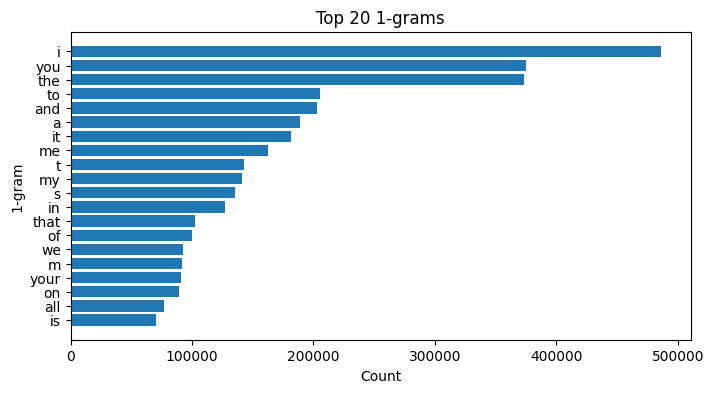

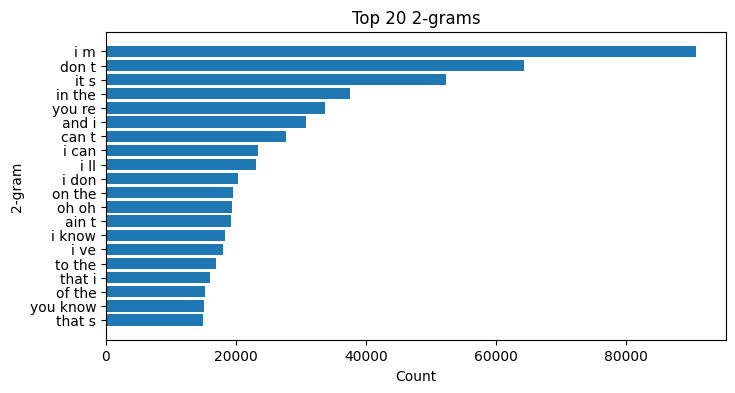

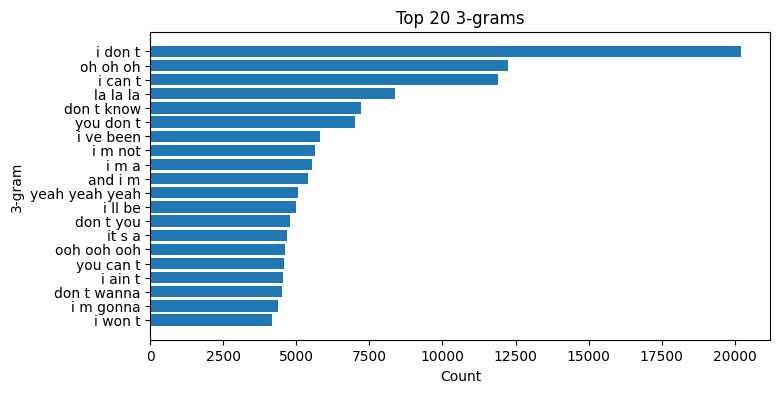

In [6]:
#tokenizing
def top_ngrams(corpus, ngram=1, top_k=20):
    tokens = [re.findall(r"\b\w+\b", txt.lower()) for txt in corpus]
    if ngram == 1:
        grams = [tok for doc in tokens for tok in doc]
    else:
        grams = [
            " ".join(doc[i:i+ngram])
            for doc in tokens
            for i in range(len(doc)-ngram+1)
        ]
    return Counter(grams).most_common(top_k)

for n in [1, 2, 3]:
    top = top_ngrams(spotify_merged['lyrics'], ngram=n, top_k=20)
    words, counts = zip(*top)
    plt.figure(figsize=(8, 4))
    plt.barh(words[::-1], counts[::-1])
    plt.title(f"Top 20 {n}-grams")
    plt.xlabel("Count")
    plt.ylabel(f"{n}-gram")
    plt.show()


Tokenization for Hits

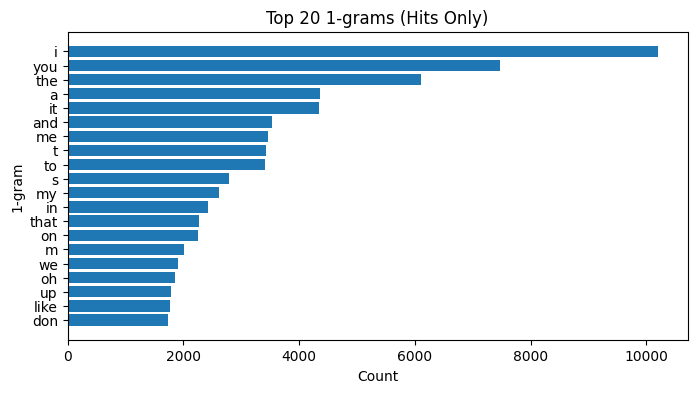

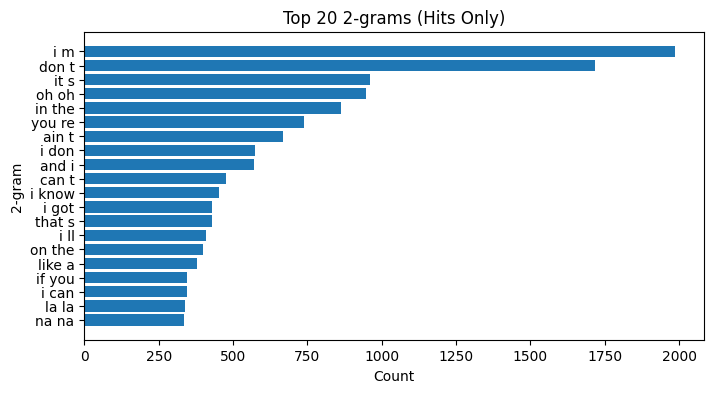

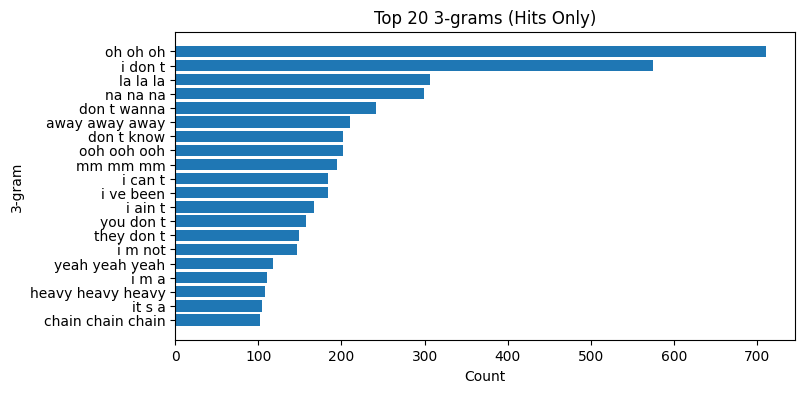

In [7]:
#only hits here
hits_only = spotify_merged[spotify_merged['hit'] == 1]

#top_ngrams 
def top_ngrams(corpus, ngram=1, top_k=20):
    tokens = [re.findall(r"\b\w+\b", txt.lower()) for txt in corpus]
    if ngram == 1:
        grams = [tok for doc in tokens for tok in doc]
    else:
        grams = [
            " ".join(doc[i:i+ngram])
            for doc in tokens
            for i in range(len(doc)-ngram+1)
        ]
    return Counter(grams).most_common(top_k)

#n-gram analyses
for n in [1, 2, 3]:
    top = top_ngrams(hits_only['lyrics'], ngram=n, top_k=20)
    words, counts = zip(*top)
    plt.figure(figsize=(8, 4))
    plt.barh(words[::-1], counts[::-1])
    plt.title(f"Top 20 {n}-grams (Hits Only)")
    plt.xlabel("Count")
    plt.ylabel(f"{n}-gram")
    plt.show()

### POS Tags Distributions

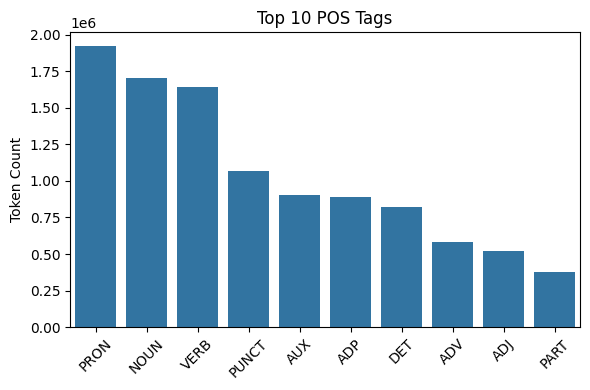

In [8]:
#pos tagging
pos_counts = Counter()
for doc in nlp.pipe(spotify_merged['lyrics'].tolist(), batch_size=50):
    pos_counts.update(tok.pos_ for tok in doc)

labels, vals = zip(*pos_counts.most_common(10))
plt.figure(figsize=(6,4))
sns.barplot(x=list(labels), y=list(vals))
plt.xticks(rotation=45)
plt.title("Top 10 POS Tags")
plt.ylabel("Token Count")
plt.tight_layout()
plt.show()

POS Tags for hits

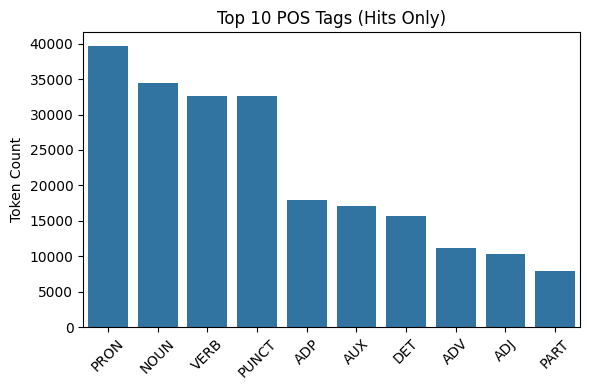

In [9]:
pos_counts = Counter()

hits_only = spotify_merged[spotify_merged['hit'] == 1]

for doc in nlp.pipe(hits_only['lyrics'].tolist(), batch_size=50):
    pos_counts.update(tok.pos_ for tok in doc)

labels, vals = zip(*pos_counts.most_common(10))
plt.figure(figsize=(6,4))
sns.barplot(x=list(labels), y=list(vals))
plt.xticks(rotation=45)
plt.title("Top 10 POS Tags (Hits Only)")
plt.ylabel("Token Count")
plt.tight_layout()
plt.show()

### Readability & Sentiment

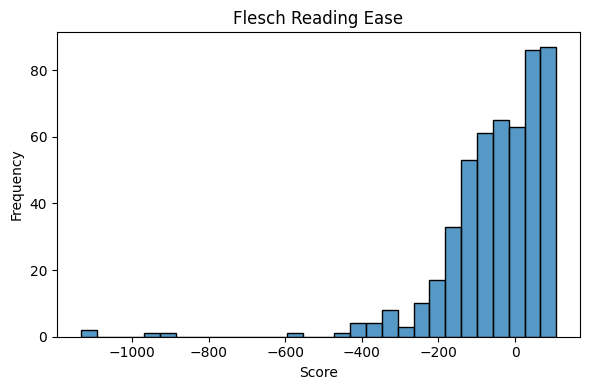

In [10]:
#small sample just for speed
small = spotify_merged.sample(500, random_state=42).copy()

small['readability'] = small['lyrics'].map(flesch_reading_ease)

plt.figure(figsize=(6,4))
sns.histplot(small['readability'].dropna(), bins=30)
plt.title("Flesch Reading Ease")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

For hits only

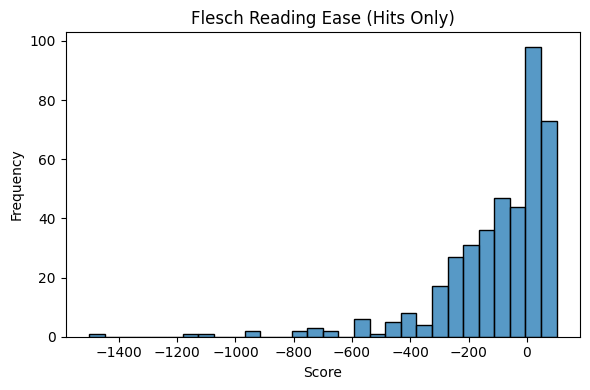

In [11]:
hits_only = spotify_merged[spotify_merged['hit'] == 1]

small_hits = hits_only.sample(min(500, len(hits_only)), random_state=42).copy()

small_hits['readability'] = small_hits['lyrics'].map(flesch_reading_ease)

plt.figure(figsize=(6,4))
sns.histplot(small_hits['readability'].dropna(), bins=30)
plt.title("Flesch Reading Ease (Hits Only)")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


### Embedding + PCA + T-SNE + KMEANS CLUSTERING 

In [12]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
emb = model.encode(spotify_merged['lyrics'].tolist(),
                   batch_size=64, show_progress_bar=True)

colors = spotify_merged['hit'].map({0: 'darkgrey', 1: 'red'})

#pca
pca2 = PCA(n_components=2, random_state=42).fit_transform(emb)
plt.figure(figsize=(6,5))
plt.scatter(pca2[:,0], pca2[:,1],
            c=colors, s=5, alpha=0.6)
plt.title("PCA of Lyrics Embeddings (Hit vs Non-Hit)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.tight_layout()
plt.show()

#t-sne
tsne2 = TSNE(n_components=2, random_state=42,
             perplexity=30).fit_transform(emb)
plt.figure(figsize=(6,5))
plt.scatter(tsne2[:,0], tsne2[:,1],
            c=colors, s=5, alpha=0.6)
plt.title("t-SNE of Lyrics Embeddings (Hit vs Non-Hit)")
plt.xlabel("Dim1"); plt.ylabel("Dim2")
plt.tight_layout()
plt.show()

#Kmeans
km = KMeans(n_clusters=8, random_state=42).fit(emb)
spotify_merged['cluster'] = km.labels_

plt.figure(figsize=(6,5))
plt.scatter(pca2[:,0], pca2[:,1],
            c=km.labels_, cmap='tab10',
            s=5, alpha=0.6)
plt.title("KMeans (k=8) on PCA Projection")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.tight_layout()
plt.show()
print("Hit rate by cluster:")
print(spotify_merged.groupby('cluster')['hit'].mean().sort_values(ascending=False))

/root/venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Batches:   9%|▉         | 51/558 [00:57<09:29,  1.12s/it]


KeyboardInterrupt: 

### Topic Modeling with LDA

In [16]:
texts = [
    re.findall(r'\b\w+\b', txt)
    for txt in spotify_merged['lyrics']
]
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=5000)
corpus = [dictionary.doc2bow(txt) for txt in texts]

lda = gensim.models.LdaModel(
    corpus, num_topics=10, id2word=dictionary,
    passes=5, random_state=42
)

for idx, topic in lda.show_topics(num_topics=10, num_words=6, formatted=False):
    words = [w for w,_ in topic]
    print(f"Topic {idx}: " + ", ".join(words))

Topic 0: up, like, with, got, they, get
Topic 1: god, from, will, with, lord, no
Topic 2: we, re, are, will, this, ll
Topic 3: don, know, just, go, want, wanna
Topic 4: love, down, heart, when, with, ah
Topic 5: ve, never, what, know, was, been
Topic 6: yeah, do, what, gonna, get, know
Topic 7: oh, baby, ooh, girl, yeah, come
Topic 8: no, got, hey, good, o, more
Topic 9: she, he, her, was, they, man


# EDA --> Distributive (from ML)

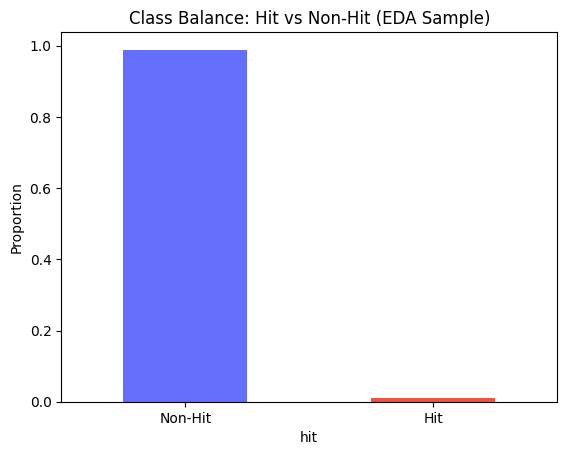

In [36]:
plt.style.use('default') 
spotify_merged['hit'].value_counts(normalize=True).plot(kind='bar', color=['#636EFA', '#EF553B'])
plt.title("Class Balance: Hit vs Non-Hit (EDA Sample)")
plt.xticks([0, 1], ['Non-Hit', 'Hit'], rotation=0)
plt.ylabel("Proportion")
plt.show()


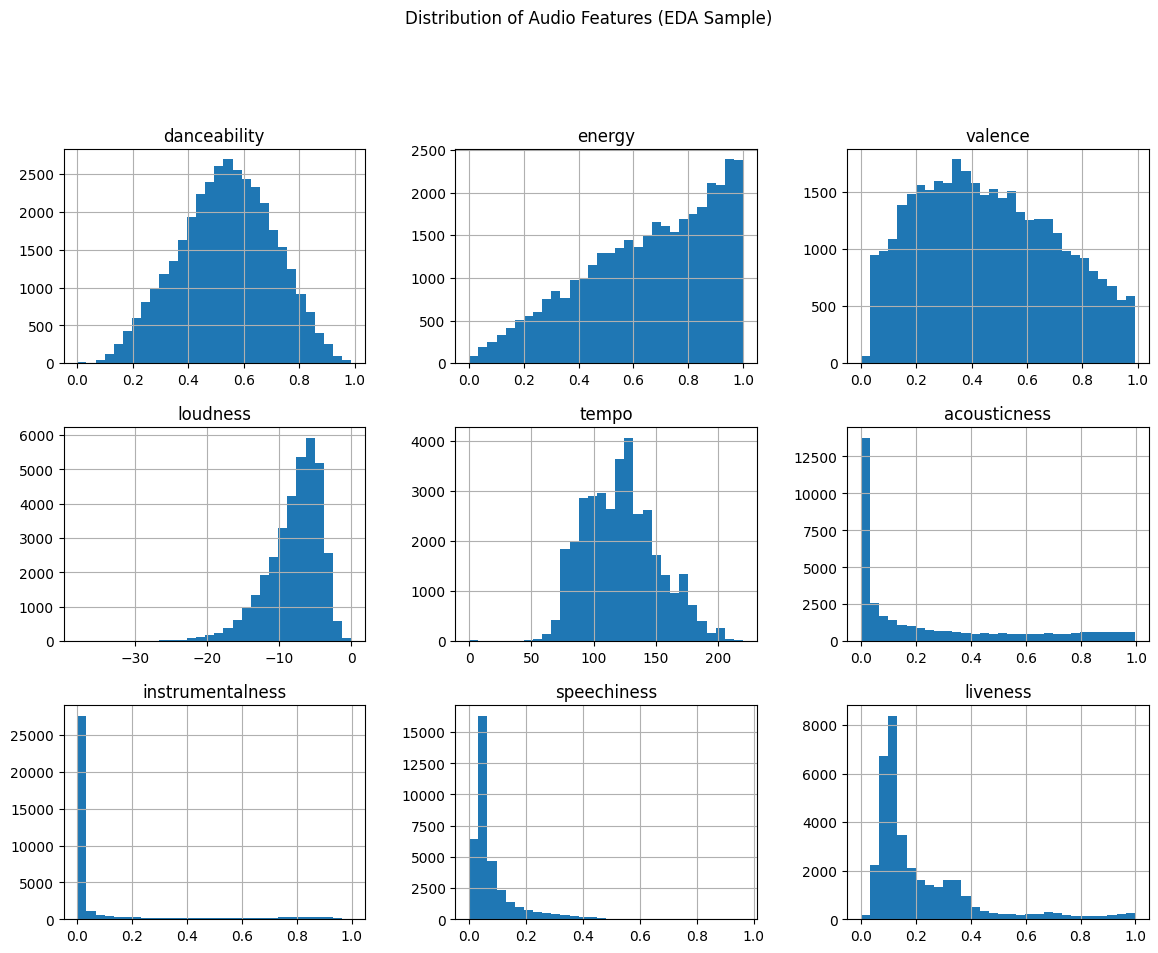

/tmp/ipykernel_138/2019166665.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_merged, x='hit', y=feature, palette='Set2')


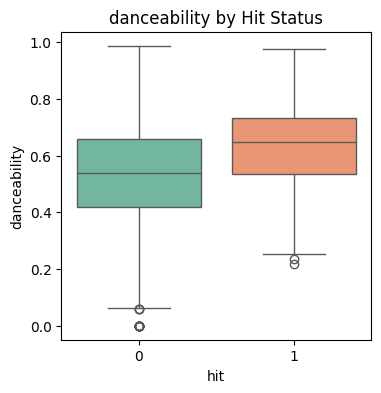

/tmp/ipykernel_138/2019166665.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_merged, x='hit', y=feature, palette='Set2')


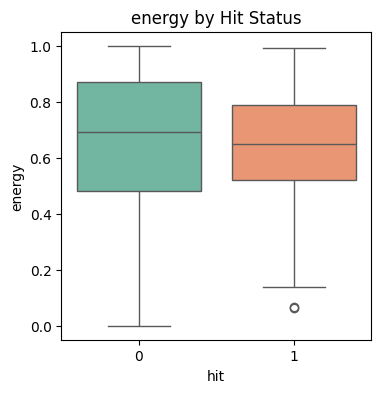

/tmp/ipykernel_138/2019166665.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_merged, x='hit', y=feature, palette='Set2')


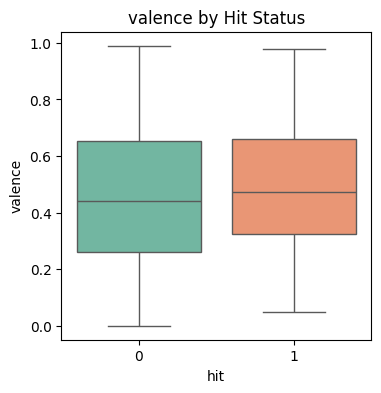

/tmp/ipykernel_138/2019166665.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_merged, x='hit', y=feature, palette='Set2')


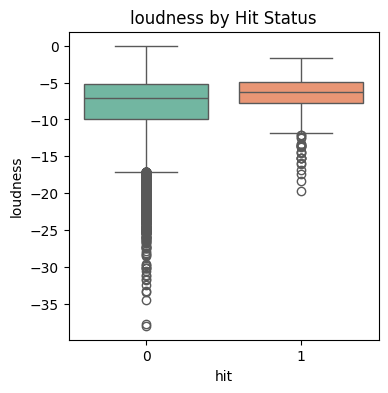

/tmp/ipykernel_138/2019166665.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_merged, x='hit', y=feature, palette='Set2')


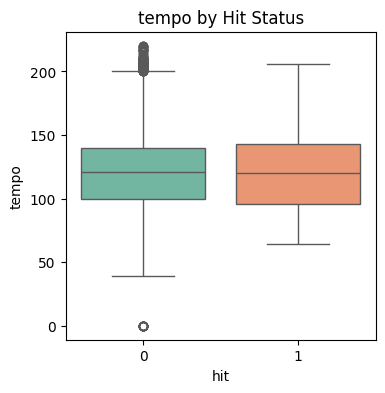

/tmp/ipykernel_138/2019166665.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_merged, x='hit', y=feature, palette='Set2')


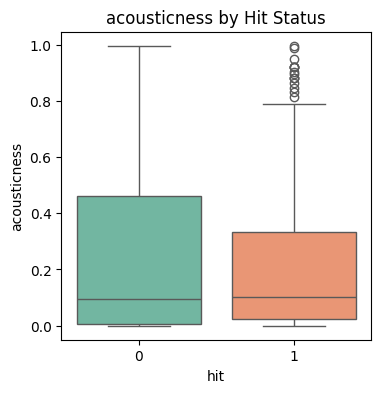

/tmp/ipykernel_138/2019166665.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_merged, x='hit', y=feature, palette='Set2')


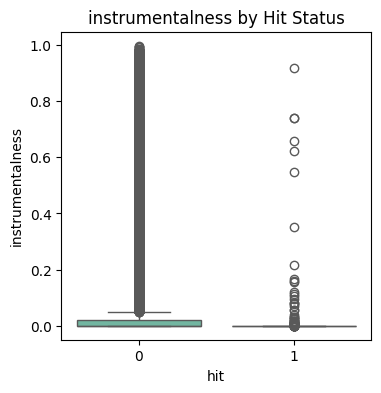

/tmp/ipykernel_138/2019166665.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_merged, x='hit', y=feature, palette='Set2')


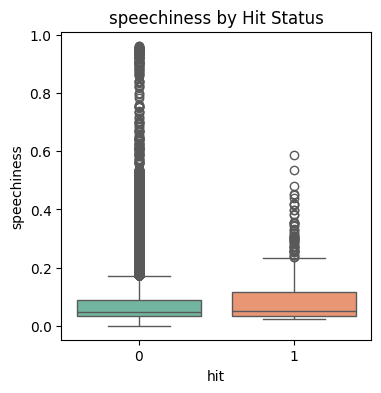

/tmp/ipykernel_138/2019166665.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_merged, x='hit', y=feature, palette='Set2')


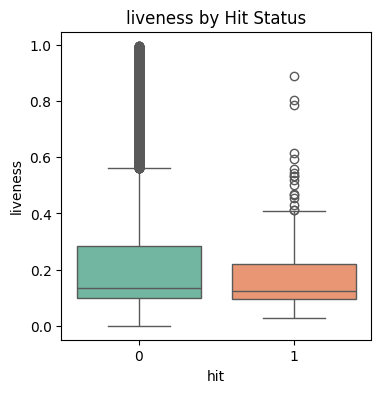

In [37]:
audio_features = [
    'danceability', 'energy', 'valence', 'loudness',
    'tempo', 'acousticness', 'instrumentalness',
    'speechiness', 'liveness'
]

#histograms
spotify_merged[audio_features].hist(bins=30, figsize=(14, 10))
plt.suptitle("Distribution of Audio Features (EDA Sample)", y=1.02)
plt.show()

#boxplots by hit
for feature in audio_features:
    plt.figure(figsize=(4, 4))
    sns.boxplot(data=spotify_merged, x='hit', y=feature, palette='Set2')
    plt.title(f"{feature} by Hit Status")
    plt.show()


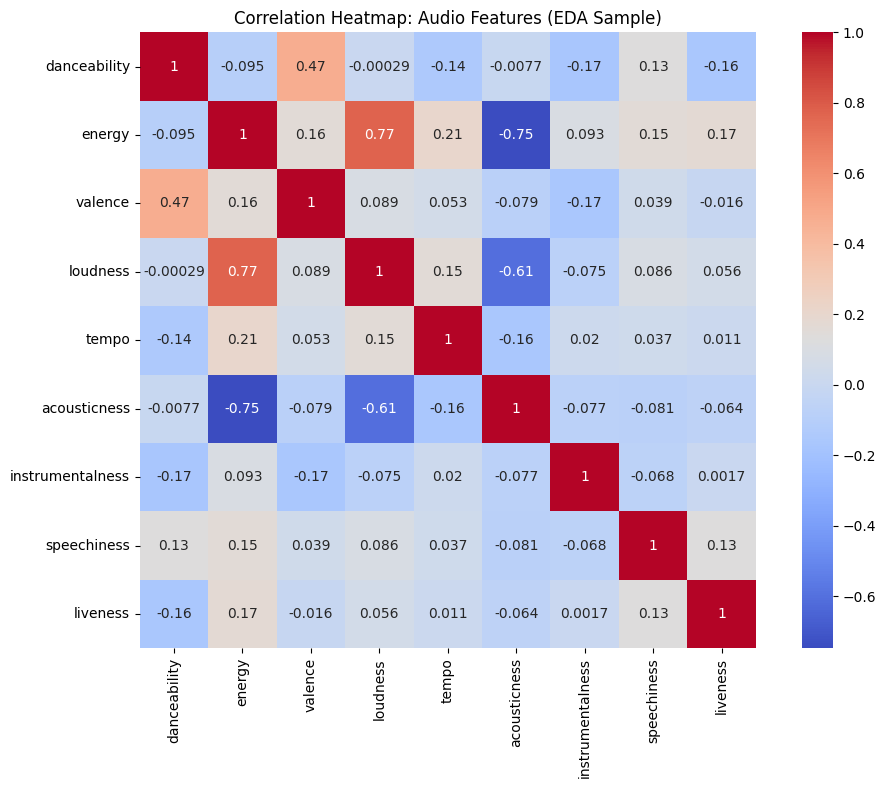

In [38]:
corr = spotify_merged[audio_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap: Audio Features")
plt.show()


Mean values by hit status (EDA Sample):
hit                        0           1
danceability        0.536315    0.632543
energy              0.655660    0.638519
valence             0.461436    0.489818
loudness           -7.940829   -6.766230
tempo             122.277834  121.028704
acousticness        0.255971    0.216513
instrumentalness    0.097674    0.015926
speechiness         0.085106    0.100186
liveness            0.217531    0.173263


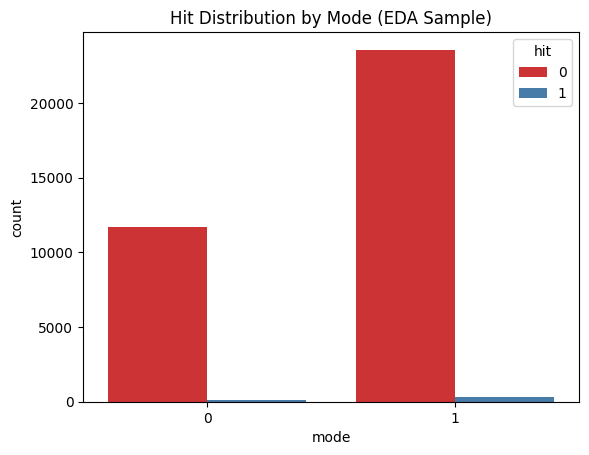

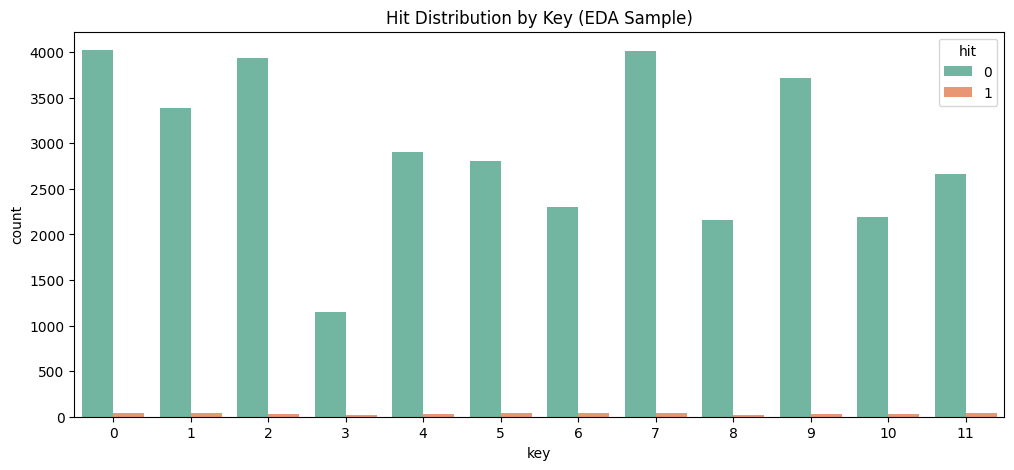

In [39]:
print("Mean values by hit status (EDA Sample):")
print(spotify_merged.groupby('hit')[audio_features].mean().T)

#bar plots
if 'mode' in spotify_merged.columns:
    sns.countplot(data=spotify_merged, x='mode', hue='hit', palette='Set1')
    plt.title("Hit Distribution by Mode (EDA Sample)")
    plt.show()

if 'key' in spotify_merged.columns:
    plt.figure(figsize=(12, 5))
    sns.countplot(data=spotify_merged, x='key', hue='hit', palette='Set2')
    plt.title("Hit Distribution by Key (EDA Sample)")
    plt.show()


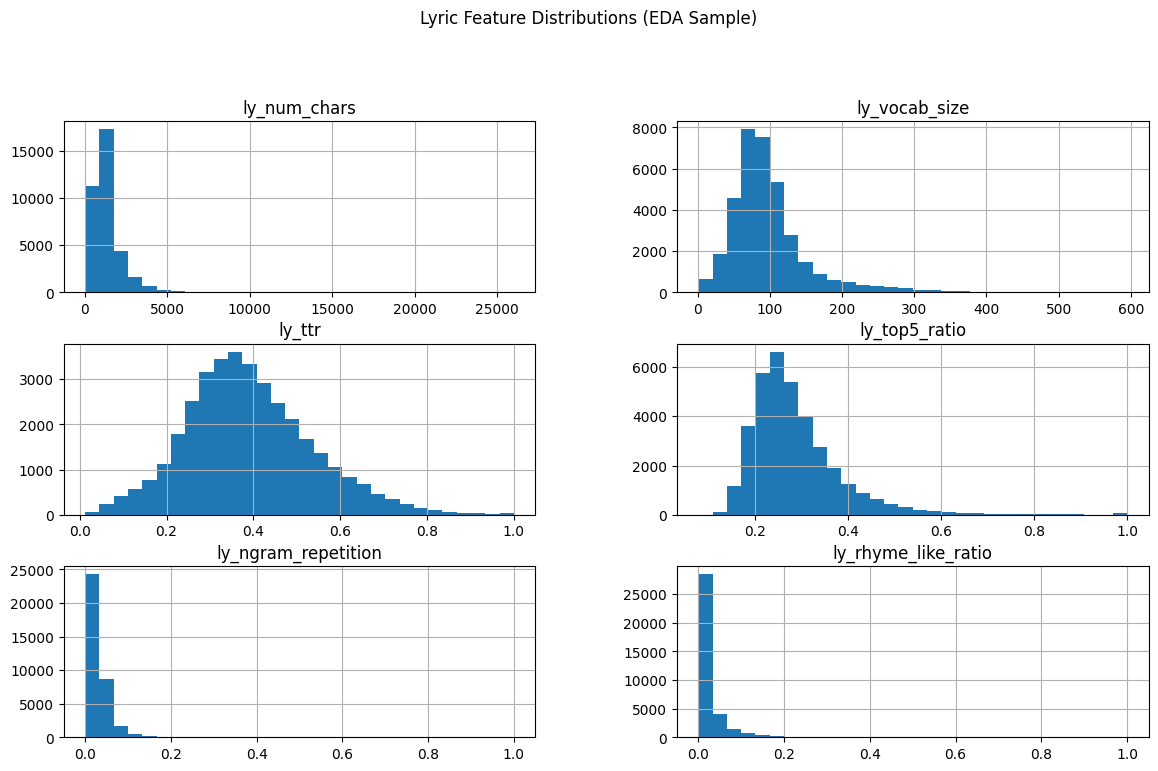

/tmp/ipykernel_138/1297970551.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_merged, x='hit', y=col, palette='Set3')


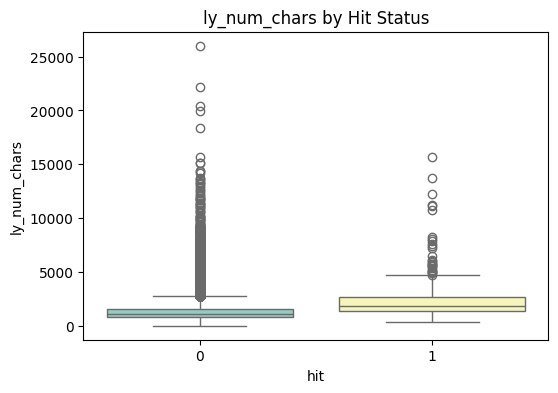

/tmp/ipykernel_138/1297970551.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_merged, x='hit', y=col, palette='Set3')


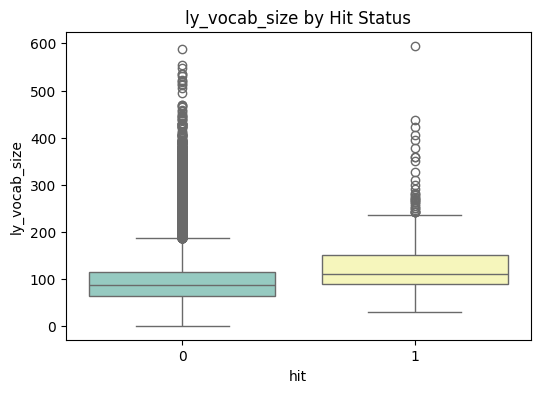

/tmp/ipykernel_138/1297970551.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_merged, x='hit', y=col, palette='Set3')


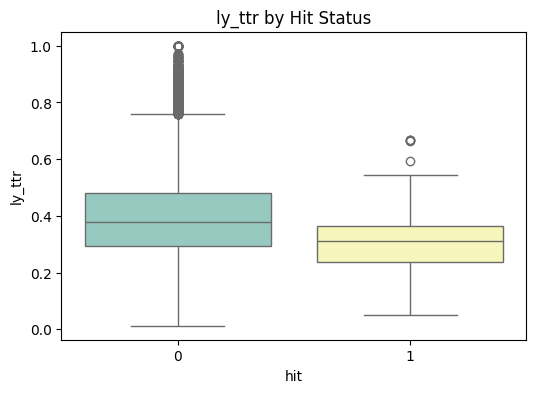

/tmp/ipykernel_138/1297970551.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_merged, x='hit', y=col, palette='Set3')


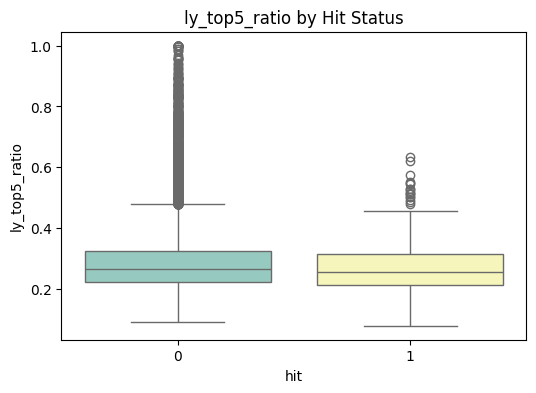

/tmp/ipykernel_138/1297970551.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_merged, x='hit', y=col, palette='Set3')


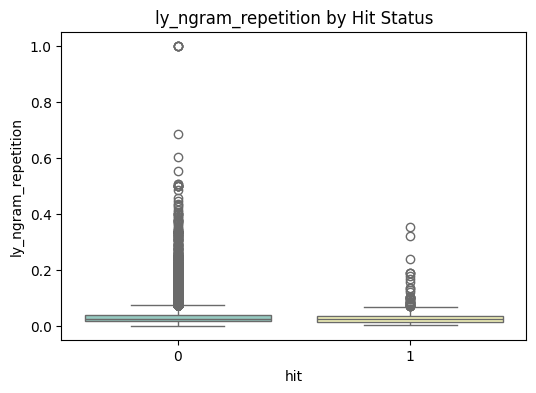

/tmp/ipykernel_138/1297970551.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_merged, x='hit', y=col, palette='Set3')


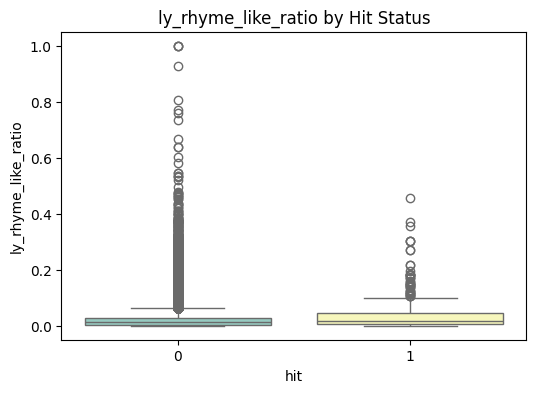

In [40]:
nlp_feats = ['ly_num_chars', 'ly_vocab_size', 'ly_ttr', 'ly_top5_ratio', 'ly_ngram_repetition', 'ly_rhyme_like_ratio']

spotify_merged[nlp_feats].hist(bins=30, figsize=(14, 8))
plt.suptitle("Lyric Feature Distributions (EDA Sample)", y=1.02)
plt.show()

for col in nlp_feats:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=spotify_merged, x='hit', y=col, palette='Set3')
    plt.title(f"{col} by Hit Status")
    plt.show()


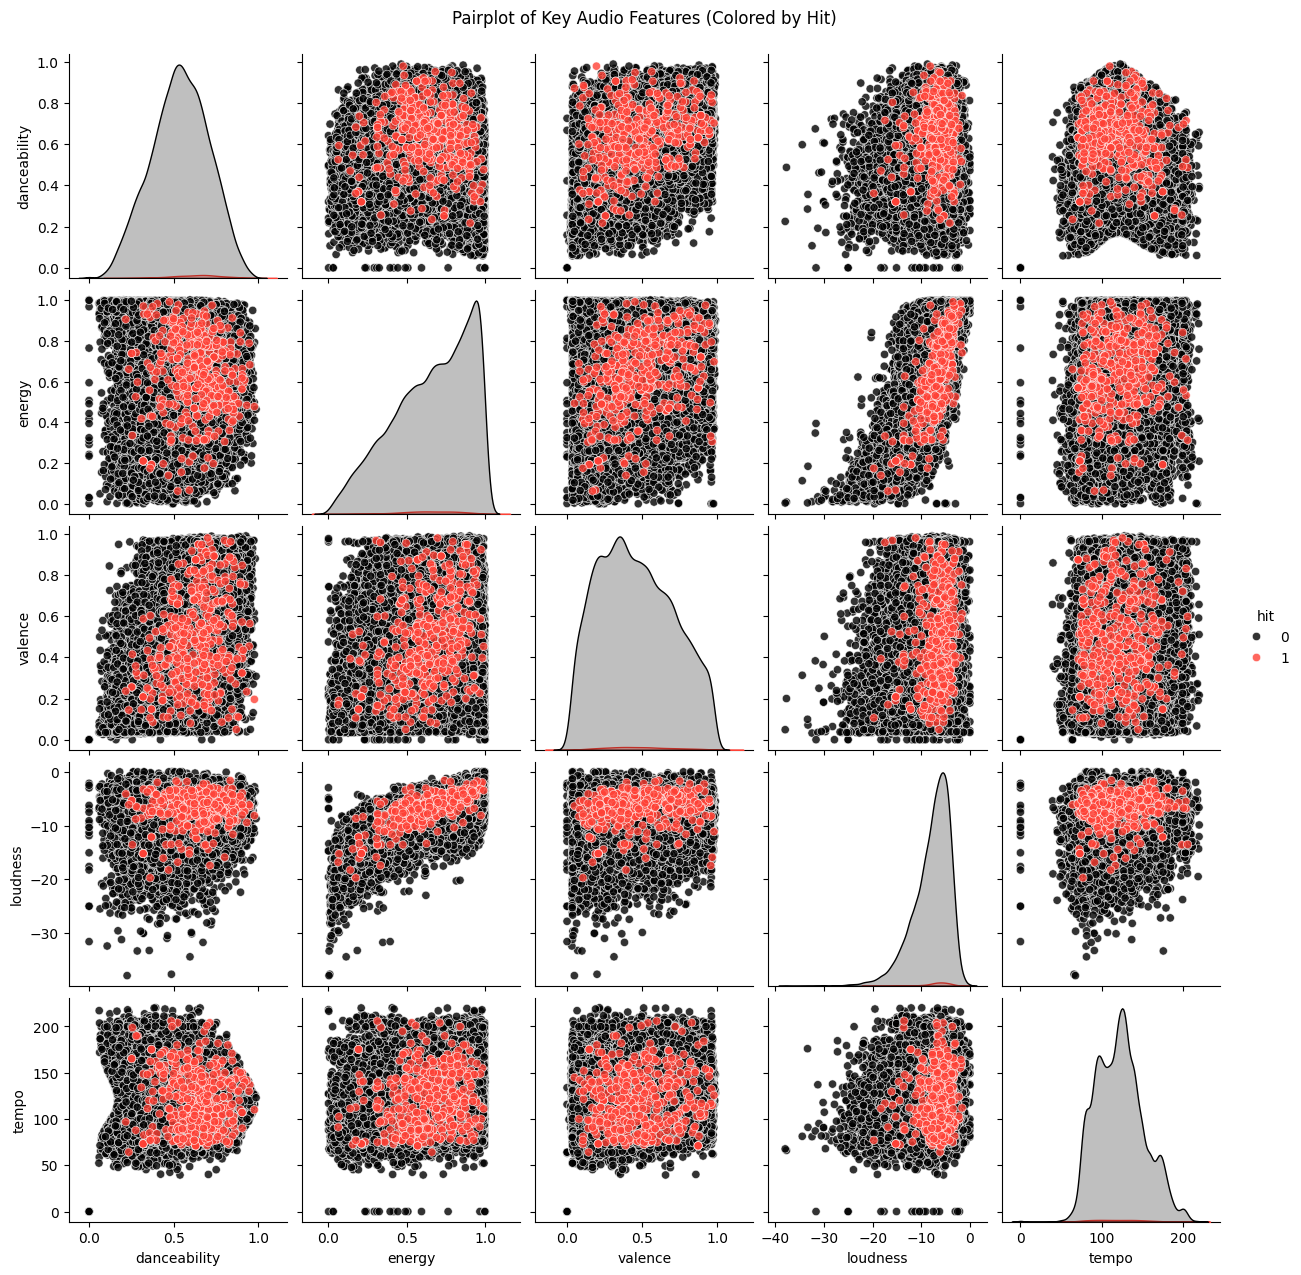

In [41]:
from seaborn import pairplot

# features
pairplot_features = ['danceability', 'energy', 'valence', 'loudness', 'tempo']

plot_data = spotify_merged[pairplot_features + ['hit']].copy()
plot_data['hit'] = plot_data['hit'].astype(str)

palette = {
    '1': '#FF4136',     # red for hits
    '0': '#00000020'    # transparent black for non-hits
}

sns.pairplot(plot_data, vars=pairplot_features, hue='hit', palette=palette, plot_kws={'alpha': 0.8})
plt.suptitle("Pairplot of Key Audio Features (Colored by Hit)", y=1.02)
plt.show()

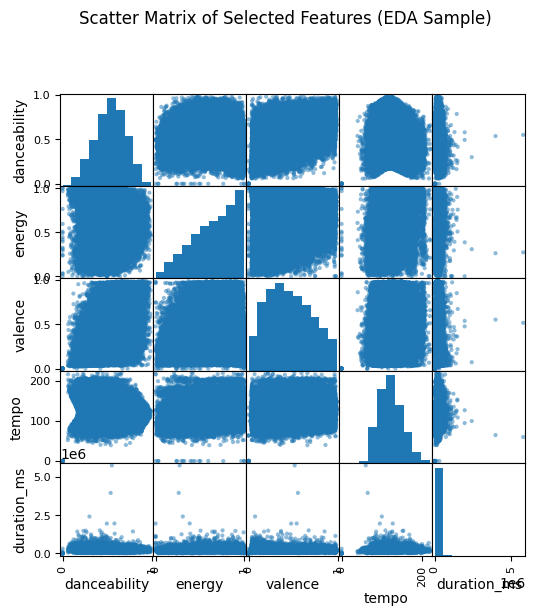

In [42]:
from pandas.plotting import scatter_matrix

scatter_features = ['danceability', 'energy', 'valence', 'tempo', 'duration_ms']

scatter_matrix(spotify_merged[scatter_features], figsize=(6, 6), diagonal='hist')
plt.suptitle("Scatter Matrix of Selected Features", y=1.02)
plt.show()

/tmp/ipykernel_138/52544798.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=spotify_merged, x='hit', y=col, palette='Set2', inner='quartile')


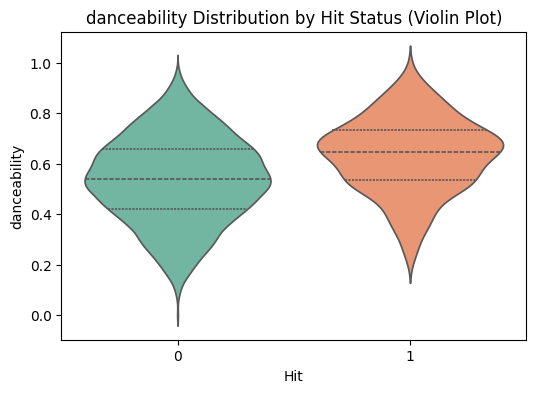

/tmp/ipykernel_138/52544798.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=spotify_merged, x='hit', y=col, palette='Set2', inner='quartile')


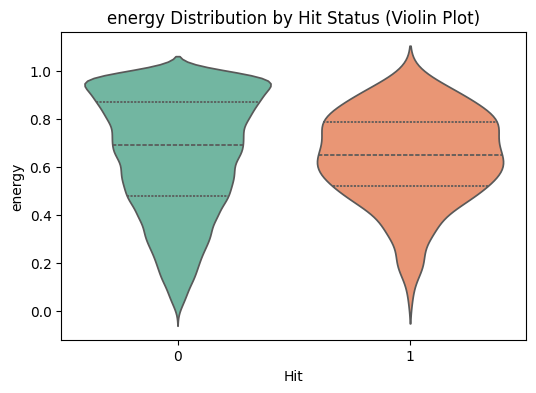

/tmp/ipykernel_138/52544798.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=spotify_merged, x='hit', y=col, palette='Set2', inner='quartile')


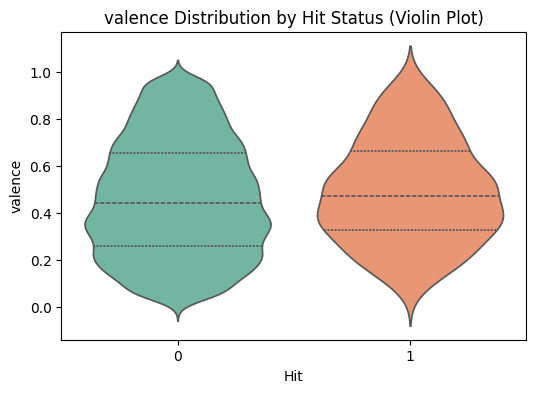

/tmp/ipykernel_138/52544798.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=spotify_merged, x='hit', y=col, palette='Set2', inner='quartile')


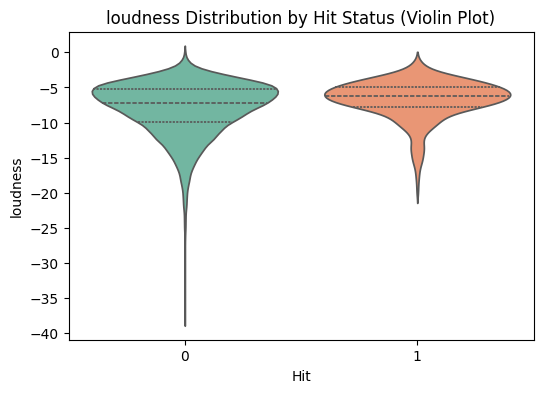

/tmp/ipykernel_138/52544798.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=spotify_merged, x='hit', y=col, palette='Set2', inner='quartile')


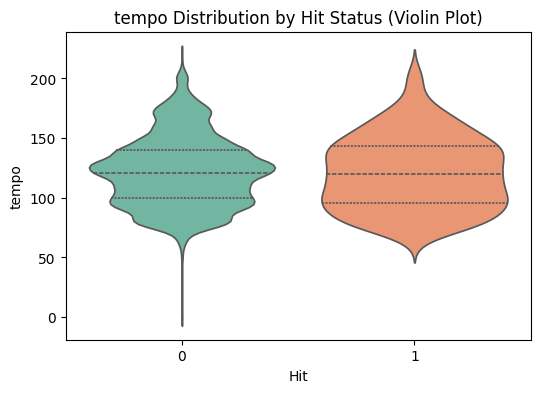

/tmp/ipykernel_138/52544798.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=spotify_merged, x='hit', y=col, palette='Set2', inner='quartile')


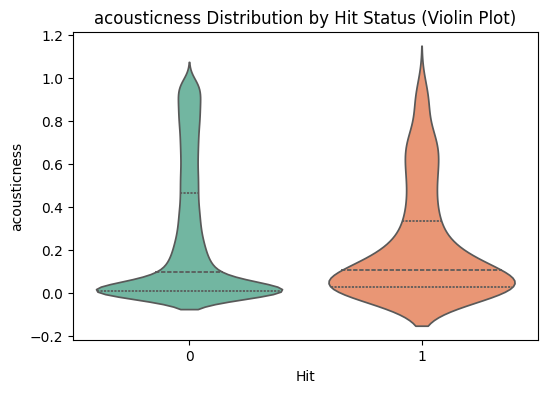

In [43]:
#violin plots
for col in ['danceability', 'energy', 'valence', 'loudness', 'tempo', 'acousticness']:
    plt.figure(figsize=(6, 4))
    sns.violinplot(data=spotify_merged, x='hit', y=col, palette='Set2', inner='quartile')
    plt.title(f"{col} Distribution by Hit Status (Violin Plot)")
    plt.xlabel('Hit')
    plt.ylabel(col)
    plt.show()

Why did we not include all of the features here?????

In [44]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

features_to_test = [
    'danceability', 'energy', 'valence', 'loudness', 'tempo',
    'acousticness', 'instrumentalness', 'speechiness',
    'ly_vocab_size', 'ly_ttr', 'ly_ngram_repetition'
]

hit_group = spotify_merged[spotify_merged['hit'] == 1]
non_hit_group = spotify_merged[spotify_merged['hit'] == 0]

results = []

for feature in features_to_test:
    hit_vals = hit_group[feature].dropna()
    non_hit_vals = non_hit_group[feature].dropna()

    #t-test
    t_stat, t_pval = ttest_ind(hit_vals, non_hit_vals, equal_var=False)

    #mann whitney u test
    u_stat, u_pval = mannwhitneyu(hit_vals, non_hit_vals, alternative='two-sided')

    results.append({
        'Feature': feature,
        'T-test p-value': round(t_pval, 5),
        'U-test p-value': round(u_pval, 5),
        'T-statistic': round(t_stat, 3),
        'U-statistic': round(u_stat, 3)
    })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='T-test p-value'))

                Feature  T-test p-value  U-test p-value  T-statistic  \
0          danceability         0.00000         0.00000       13.091   
3              loudness         0.00000         0.00000        8.391   
6      instrumentalness         0.00000         0.00000      -17.759   
8         ly_vocab_size         0.00000         0.00000        9.658   
9                ly_ttr         0.00000         0.00000      -16.871   
5          acousticness         0.00213         0.19933       -3.090   
7           speechiness         0.00413         0.11343        2.884   
2               valence         0.00923         0.00918        2.615   
1                energy         0.06788         0.00273       -1.830   
4                 tempo         0.41273         0.35931       -0.820   
10  ly_ngram_repetition         0.66580         0.11188        0.432   

    U-statistic  
0     9581875.5  
3     8460684.0  
6     4884591.0  
8     9845250.0  
9     4568413.0  
5     7478948.0  
7     754

## PCA For Visualization

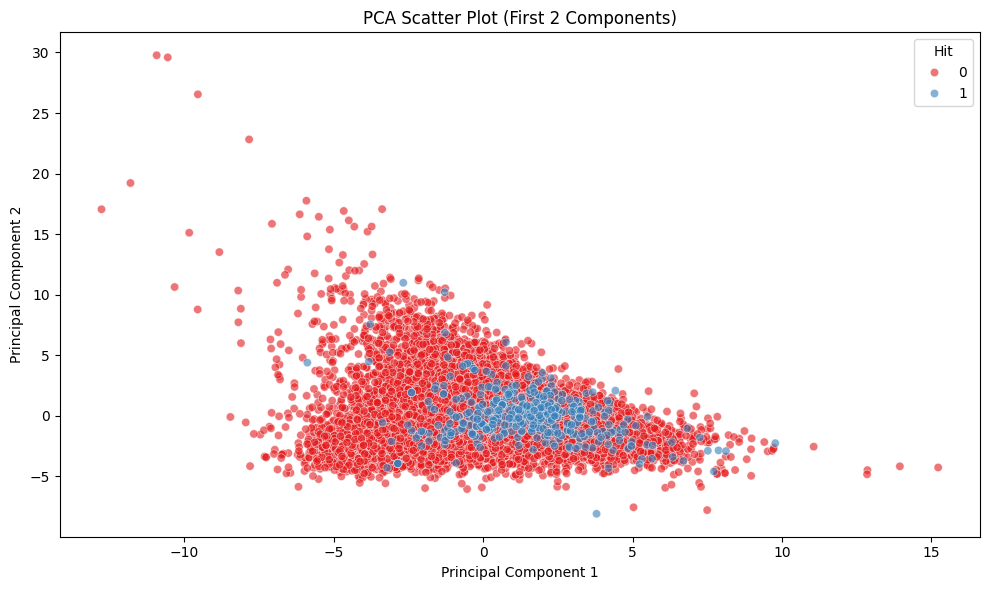

In [45]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

exclude_cols = ['id', 'album_name', 'hit', 'hit_hot100', 'hit_radio', 'hit_streaming', 'hit_digital',
                'weeks_in_charts_total', 'peak_rank', 'peak_normalized']
numeric_cols = spotify_merged.select_dtypes(include=['float64', 'int64']).columns.difference(exclude_cols).tolist()

#scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(spotify_merged[numeric_cols])

#pca
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

spotify_merged['PCA1'] = X_pca[:, 0]
spotify_merged['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_merged, x='PCA1', y='PCA2', hue='hit', palette='Set1', alpha=0.6)
plt.title("PCA Scatter Plot (First 2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Hit')
plt.tight_layout()
plt.show()

In [46]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_
pd.Series(pca.components_[0], index=numeric_cols).sort_values(ascending=False)

loadings_pc1 = pd.Series(pca.components_[0], index=numeric_cols)
print(loadings_pc1.abs().sort_values(ascending=False).head(5))

loadings_pc2 = pd.Series(pca.components_[1], index=numeric_cols)
print(loadings_pc2.abs().sort_values(ascending=False).head(5))


PCA1             0.509622
ly_vocab_size    0.350768
ly_num_chars     0.337302
loudness         0.317646
energy           0.311312
dtype: float64
PCA2                   0.526845
ly_top5_ratio          0.390964
ly_ngram_repetition    0.378274
energy                 0.276333
ly_rhyme_like_ratio    0.258957
dtype: float64


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=068aa808-4695-4d75-a14b-785a94b3cf38' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>